# Athletic Performance and Easily Measurable Physical Traits. 
## Connor Monk


## Intro
This project will be about olympic athletes. Athletic success is a huge topic globally, people bet on sports and athletes everyday, and predicting a players performance is not always easy. Sports performance metrics are not always available or easy to record. 
The goal of this analysis is to try to predict, using only easy to obtain and readily available data such as height, weight, and age. This is a classification problem the traits of athletes are used to predict which class they will be in. The 4 classes used will be 0--indicating no medal, 1--indicating bronze, 2--indicating silver, and 3--indicating they got the gold. Some traits are be more impactful between different sports, and in some sports these traits are largely irrelevant. This analysis will likely not be remarkably useful for betting, or for sports recruiters looking at new athletes, but given only data that you can essentially estimate just by looking at someone, if it is helpful at any capacity it could help influence a correct bet or recruit choice occasionally. 


## The Data
The source of the data used in this analysis is "https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results"
This is a data set of olympic athletes over the last 120 years and has data on their height, weight, age, sex, sport, and 10 other irrelevant categories. 

The 'City', 'Team', "NOC", "Event", and "Games" features were dropped due to NaN values or because of irrelevance/redundance. Additionally, NaN values were filled in with 0s. Several outliers were also dropped due to their probable innacuracy, such as a few weights that were lighter or smaller than the purported lightest and shortest olympians of all time. Ultimately, many rows needed to be removed due to lacking data. In total, 163,928 rows were dropped and 107,188 are in the final working data set. The vast majority of this was due to lacking height, or weight information. The remaining features in the dataset are 'ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Year', 'Sport', and 'Medal'. The final data set has 4 categorical features and 5 numeric features. The main features are the numerical height, weight, and age of the athletes, and the main categorical features are the respective sports and the medals won or not won by each athlete. 


## Exploratory Data Analysis
After the initial cleaning, some exploratory data analysis on the relationship between height and sport and weight and sport were done. Many olympic events were found to have no relationship at all between the sport and one or both of these traits. For example, curling had no relationship with height and shooting had no relationship with weight. In total 14 sports were not related to height -- Cross Country Skiing, Curling, Snowboarding, Art Competitions, Boxing, Figure Skating, Golf, Hockey, Ice Hockey, Lacrosse, Motorboating, Rugby, Shooting, and triathlon. 13 sports were also not related with weight -- Athletics, Badminton, Figure Skating, Football, Golf, Ice Hockey, Lacrosse, Modern Pentathalon, Motorboating, Swimming, Tennis, Curling, and Skeleton. 5 sports were related to neither height nor weight -- Figure skating, golf, ice hockey, motorboating, and curling. Additionally, 4 sports were excluded from the final analysis --wrestling, weightlifting, judo, and taekwondo-- as they have all have weight classes. Some sports, like baseball were not related to age but I did not remove them because it would have been removing too many sports that were related in height and weight. Overall age had a remarkably negligable relationship with olympic sports because many slightly favored youth and many slightly favored older age, such as gymnastics and equestrianism respectively. 

The remaining sports to be examined are 'Baseball', 'Basketball,', 'Beach Volleyball', 'Biathlon', 'Bobsleigh', 'Canoeing', 'Cycling', 'Diving', 'Equestrianism', 'Fencing', 'Freestyle Skiing', 
'Gymnastics', 'Handball', 'Luge', 'Nordic Combined', "Rhythmic Gymnastics", 'Rowing', 'Rugby Sevens', 'Sailing', 'Short Track Speed Skating', 'Ski Jumping', 'Softball',
'Speed Skating', 'Synchronized Swimming', 'Table Tennis', 'Trampolining', 'Tug-Of-War', 'Volleyball', and 'Water Polo'. 

Unfortunatly, all of track and field was clustered under 'Athletics' and so there was no statistically significant relationship between the sports and weight. This is expected as if you cluster in 800m runners with shotput and discus throwers and high jumpers, the average heights and weights are all over the place for the whole group. This would have been interesting to see as the most dominant sprinter of all time, Usain Bolt, is much taller than the rest of his former competition at 6'5"(196cm). Additionally, most of the team sports weren't related to any traits but it is possible that within the team, each position could be associated with one of these traits in either direction but all the positions put together is too much variation. 

After running many linear regressions of Medal as predicted by height, medal as predicted by weight, and medal as predicted by age. I've found there is a significant association between height and weight and getting a medal in the olympics overall and especially within each sport. The difference is not huge but those that are taller by about ~3.5cm from both sexes are more likely to win compared to not even medaling. Winners are also slightly heavier but are neither the heaviest or the tallest absolutely. Each sport was associated somewhat differently with both traits. 




           Height  Weight
Sex Medal                
F   0      166.41   58.75
    1      171.30   63.67
    2      171.42   63.98
    3      171.69   64.18
M   0      178.68   75.22
    1      183.10   80.56
    2      183.03   80.48
    3      183.64   81.24


<AxesSubplot:title={'center':'Male Olympian Weight'}, xlabel='Medal', ylabel='Weight'>

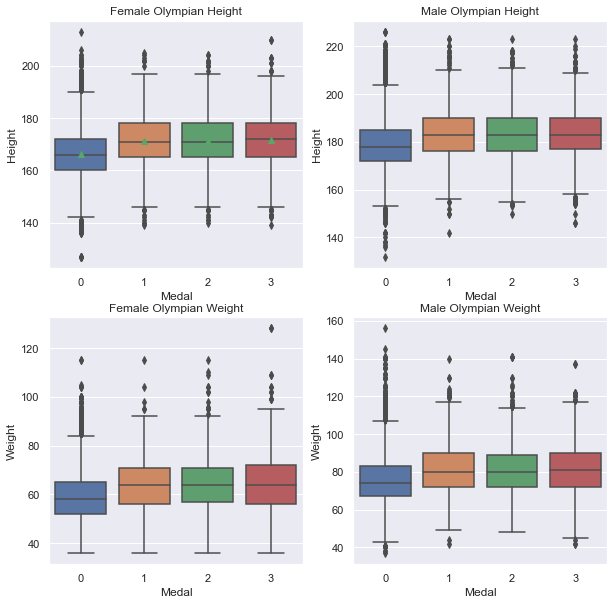

In [22]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors
from statsmodels.formula.api import ols
from statsmodels.graphics.api import interaction_plot, abline_plot
from statsmodels.stats.anova import anova_lm
import patsy
import sklearn as sk
import sklearn.neighbors as neighbors
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis




sns.set()
data = pd.read_csv("cleaned_and_signified_withwinter.csv") 
pd.set_option('display.max_rows', 500)
df = pd.DataFrame(data)

###Cleaning###
##############
# col = df.columns
# df = df.drop(columns = ['City', 'Team', "NOC", "Event", "Games"])
# dfem['Medal'] = df['Medal'].apply({'Gold':3, 'Silver':2, 'Bronze':1, 'NaN':0}.get)
# df = df[df["Height"] > 100]
# df = df[df["Weight"] > 35]
# df = df[df["Season"] == "Summer"]
# df = df.fillna(0)

#remove insignificant sports or sports that are likely confounded. 
#remove insignificant sports or sports that are likely confounded. 
nonSigHeight = ['Archery', 'Cross Country Skiing', 'Curling', 'Snowboarding', 'Art Competitions', 'Boxing', 'Figure Skating', 'Golf', 'Hockey', 'Ice Hockey', 'Lacrosse', 'Motorboating', 'Rugby', 'Shooting', 'Triathlon'] 
nonSigWeight = ['Athletics', 'Badminton', 'Figure Skating', 'Football', 'Golf', 'Ice Hockey', 'Lacrosse', 'Modern Pentathalon', 'Motorboating', 'Swimming', 'Tennis', 'Curling',  'Skeleton']
nonSigAge = ['Baseball', 'Handball', 'Modern Pentathalon', 'Rugby Sevens', 'Softball', 'Table Tennis', 'Trampolining', 'Tug-Of-War']
nonSigSports = ['Wrestling', 'Weightlifting', 'Taekwondo', 'Judo', 'Tug-Of-War']

df = df[df["Sport"].isin(nonSigHeight) == False]
df = df[df["Sport"].isin(nonSigWeight) == False]
df = df[df["Sport"].isin(nonSigSports) == False]
# df = df[df["Sport"].isin(nonSigAge) == False]

# df.to_csv("cleaned_and_signified_withwinter.csv")

HeightandWeightSig = ['Baseball', 'Basketball,', 'Beach Volleyball', 'Biathlon', 'Bobsleigh', 'Canoeing', 'Cycling', 'Diving', 'Equestrianism', 'Fencing', 'Freestyle Skiing', 
'Gymnastics', 'Handball', 'Luge', 'Nordic Combined', "Rhythmic Gymnastics", 'Rowing', 'Rugby Sevens', 'Sailing', 'Short Track Speed Skating', 'Ski Jumping', 'Softball',
'Speed Skating', 'Synchronized Swimming', 'Table Tennis', 'Trampolining', 'Tug-Of-War', 'Volleyball', 'Water Polo']

## organize
dfem = df[df["Sex"] == 'F']
dmale = df[df["Sex"] == 'M']
dwinner = df[df["Medal"] == 3]

# fArchery = dfem[dfem["Sport"] == "Archery"] # not actually sig 
# fBaseball = dfem[dfem["Sport"] == "Baseball"] # no females
fBasketball = dfem[dfem["Sport"] == "Basketball"]
fBeachVolleyball = dfem[dfem["Sport"] == "Beach Volleyball"]
fBiathlon = dfem[dfem["Sport"] == "Biathlon"]
fBobsleigh = dfem[dfem["Sport"] == "Bobsleigh"]
fCanoeing = dfem[dfem["Sport"] == "Canoeing"]
fCycling = dfem[dfem["Sport"] == "Cycling"]
fDiving = dfem[dfem["Sport"] == "Diving"]
fEquestrianism = dfem[dfem["Sport"] == "Equestrianism"]
fFencing = dfem[dfem["Sport"] == "Fencing"]
fFreestyleSkiing = dfem[dfem["Sport"] == "Freestyle Skiing"]
fGymnastics = dfem[dfem["Sport"] == "Gymnastics"]
fHandball = dfem[dfem["Sport"] == "Handball"]
fLuge = dfem[dfem["Sport"] == "Luge"] # no females
# fNordicCombined = dfem[dfem["Sport"] == "Nordic Combined"] # no females
fRhythmicGymnastics = dfem[dfem["Sport"] == "Rhythmic Gymnastics"]
fRowing = dfem[dfem["Sport"] == "Rowing"]
fRugbySevens = dfem[dfem["Sport"] == "Rugby Sevens"]
fSailing = dfem[dfem["Sport"] == "Sailing"]
fShortTrackSpeedSkating = dfem[dfem["Sport"] == "Short Track Speed Skating"]
# fSkiJumping = dfem[dfem["Sport"] == "Ski Jumping"] # not enough
fSoftball = dfem[dfem["Sport"] == "Softball"] 
fSpeedSkating = dfem[dfem["Sport"] == "Speed Skating"]
fSynchronizedSwimming = dfem[dfem["Sport"] == "Synchronized Swimming"]
fTableTennis = dfem[dfem["Sport"] == "Table Tennis"]
fTrampolining = dfem[dfem["Sport"] == "Trampolining"]
# fTugOfWar = dfem[dfem["Sport"] == "Tug-Of-War"] # no females
fVolleyball = dfem[dfem["Sport"] == "Volleyball"]
fWaterPolo = dfem[dfem["Sport"] == "Water Polo"]
# fTaekwondo = dfem[dfem["Sport"] == "Taekwondo"] # WeightClass
# fJudo = dfem[dfem["Sport"] == "Judo"] WeightClass 

# mArchery = dmale[dmale["Sport"] == "Archery"] #not actually sig
mBaseball = dmale[dmale["Sport"] == "Baseball"]
mBasketball = dmale[dmale["Sport"] == "Basketball"]
mBeachVolleyball = dmale[dmale["Sport"] == "Beach Volleyball"]
mBiathlon = dmale[dmale["Sport"] == "Biathlon"]
mBobsleigh = dmale[dmale["Sport"] == "Bobsleigh"]
mCanoeing = dmale[dmale["Sport"] == "Canoeing"]
mCycling = dmale[dmale["Sport"] == "Cycling"]
mDiving = dmale[dmale["Sport"] == "Diving"]
mEquestrianism = dmale[dmale["Sport"] == "Equestrianism"]
mFencing = dmale[dmale["Sport"] == "Fencing"]
mFreestyleSkiing = dmale[dmale["Sport"] == "Freestyle Skiing"]
mGymnastics = dmale[dmale["Sport"] == "Gymnastics"]
mHandball = dmale[dmale["Sport"] == "Handball"]
mLuge = dmale[dmale["Sport"] == "Luge"]
mNordicCombined = dmale[dmale["Sport"] == "Nordic Combined"]
# mRhythmicGymnastics = dmale[dmale["Sport"] == "Rhythmic Gymnastics"] #no males
mRowing = dmale[dmale["Sport"] == "Rowing"]
mRugbySevens = dmale[dmale["Sport"] == "Rugby Sevens"]
mSailing = dmale[dmale["Sport"] == "Sailing"]
mShortTrackSpeedSkating = dmale[dmale["Sport"] == "Short Track Speed Skating"]
mSkiJumping = dmale[dmale["Sport"] == "Ski Jumping"]
# mSoftball = dmale[dmale["Sport"] == "Softball"] # No males 
mSpeedSkating = dmale[dmale["Sport"] == "Speed Skating"]
# mSynchronizedSwimming = dmale[dmale["Sport"] == "Synchronized Swimming"] # No males
mTableTennis = dmale[dmale["Sport"] == "Table Tennis"]
mTrampolining = dmale[dmale["Sport"] == "Trampolining"]
# mTugOfWar = dmale[dmale["Sport"] == "Tug-Of-War"] too small of a sample 
mVolleyball = dmale[dmale["Sport"] == "Volleyball"]
mWaterPolo = dmale[dmale["Sport"] == "Water Polo"]
# mTaekwondo = dmale[dmale["Sport"] == "Taekwondo"] # WeightClass
# mJudo = dmale[dmale["Sport"] == "Judo"] # WeightClass 

approvedsportsfem = [fBasketball, fBeachVolleyball, fBiathlon, fBobsleigh, fCanoeing, fCycling, fDiving, fEquestrianism, fFencing, fFreestyleSkiing, fGymnastics,
fHandball, fLuge, fRhythmicGymnastics, fRowing, fRugbySevens, fSailing, fShortTrackSpeedSkating, fSoftball, fSpeedSkating, 
fSynchronizedSwimming, fTableTennis, fTrampolining, fVolleyball, fWaterPolo]


approvedsportsmale = [mBaseball,mBasketball,mBeachVolleyball, mBiathlon,mBobsleigh, mCanoeing, mCycling, mDiving, mEquestrianism, mFencing, mFreestyleSkiing, mGymnastics,
mHandball, mLuge, mNordicCombined, mRowing, mRugbySevens, mSailing, mShortTrackSpeedSkating, mSkiJumping, mSpeedSkating, mTableTennis, mTrampolining, mVolleyball, mWaterPolo]


# print(fArchery.Sport[117])


## Data
# Overall Body Stats by Sex and Placing
print(df.groupby(['Sex', 'Medal'])[['Height', 'Weight']].mean().round(2))



# mdl_dfHeight = smf.ols('Height ~ C(Medal)', data = df).fit()
# # //Hanova = sm.stats.anova_lm(mdl_dfHeight, typ=1)

# mdl_dfWeight = smf.ols('Weight ~ C(Medal)', data = df).fit()
# #// Wanova = sm.stats.anova_lm(mdl_dfWeight, typ=1)

# ## Visualizations 
# # as data
# df.groupby(['Sex', 'Medal'])[['Height', 'Weight']].median().round(2)
# # as figures
fig, axes = plt.subplots(2, 2, sharex=False, figsize=(10,10))
axes[0,0].set_title('Female Olympian Height')
axes[0,1].set_title('Male Olympian Height')
axes[1,0].set_title('Female Olympian Weight')
axes[1,1].set_title('Male Olympian Weight')
sns.boxplot(ax=axes[0,0],x = "Medal", y = "Height", data = dfem, showmeans=True)
sns.boxplot(ax=axes[0,1],x = "Medal", y = "Height", data = dmale)
sns.boxplot(ax=axes[1,0],x = "Medal", y = "Weight", data = dfem)
sns.boxplot(ax=axes[1,1],x = "Medal", y = "Weight", data = dmale)

# print("Height anova\n",Hanova)
# print("\n\nWeight anova\n",Wanova)

# print("\n",df.groupby(['Sex', 'Medal'])[['Height', 'Weight']].mean().round(2))

# print(df.Height.hist(by=df['Sport'], figsize = (20,20), sharex=False))


# datawin


# df
# dwin
# df.boxplot("Height")
# dwin.boxplot("Height")

# df.to_csv("cleaned.csv") #Export to CSV 







### Figure 1 and 2 (Above)

This shows the relationship between getting no medal (0), and getting a bronze (1), silver (2), or gold (3) medal and height and weight between both sexes. The men that got gold medals were 4.96cm taller on average and weighed 6.02kg more than males that did not place. The women that got gold medals were 5.28cm taller and weighed 5.43kg more than the women that did not place. 

In [23]:
# plt.scatter(df.Year,df.Height)
# plt.show()

# plt.scatter(df.Year,df.Weight)
# plt.show()

heightyear = smf.ols('Height ~ Year', data = df).fit() #year and Height regression
# heightyear.summary()
weightyear = smf.ols('Weight ~ Year', data = df).fit() #year and weight regression
# weightyear.summary()
sportheight = smf.ols('Height ~ C(Sport)', data = df).fit() #sport and Height regression
sportHS = sportheight.summary()
sportweight = smf.ols('Weight ~ C(Sport)', data = df).fit() #sport and Height regression
# sportWS = sportweight.summary()
yearheight = smf.ols('Year ~ Height', data = df).fit() #year and Height regression
# yearheight.summary()
yearmulti = smf.ols('Year ~ Height+Weight', data = df).fit()
yearbyheight =  yearmulti.summary()
# medalH = smf.ols('Medal ~ Height+Weight', data = df).fit()
# medalbyheight = medalH.summary()
sportage = smf.ols('Age ~ C(Sport)', data = df).fit()


winheight = smf.ols('Medal ~ Height + C(Sport)', data = df).fit()


winweight = smf.ols('Medal ~ Weight + C(Sport)', data = df).fit()
print("Medal as predicted by height and sport\n\n",winheight.summary())
print("\n\nMedal as predicted by weight and sport\n\n", winweight.summary())

Medal as predicted by height and sport

                             OLS Regression Results                            
Dep. Variable:                  Medal   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     159.8
Date:                Mon, 02 May 2022   Prob (F-statistic):               0.00
Time:                        23:34:32   Log-Likelihood:            -1.1674e+05
No. Observations:              101302   AIC:                         2.335e+05
Df Residuals:                  101271   BIC:                         2.338e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

### Figures 3 and 4 (above)

These show the relationship between the medal recieved  (or not recieved) and height and sport for both sexes combined. When it is just height as predicted by sport, there are several negative coeficcients that are significant, like gymnastics. Yet interestingly even in gymnastics where the average competitor is much smaller than the rest of the athletes, there is still a bias, albeit very small, towards the taller and heavier winning gold. 

### Conclusions from the Exploratory Data Analysis
Ultimately I found that there is a present relationship that is statistically significant between height and weight and many sports, and within each sport there is a relationship between being taller, heavier, and placing better. Some complications that could potentially make results less significant than the overall differences in height and weight suggest they may be is that there could simply be more medals given out for sports where the athletes are on average heavier and taller. However, within each sport the relationship is still present and worth investigating. 

## Logistic Classification 

To create binary categories, all gold medalists were changed to 1, and everyone else was changed to a 0. From this I made a logistic model to try to predict whether an athlete in a given sport would win, or not get a medal, given only height, weight, and age.

101302


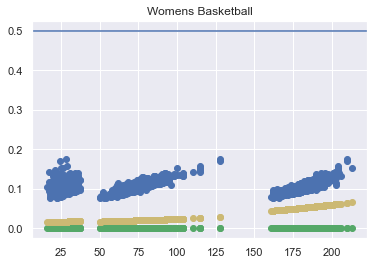

Score is 0.8939519469759735
Test score is 0.8944099378881988


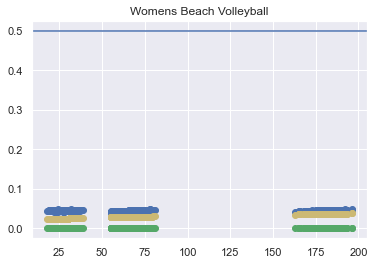

Score is 0.9547169811320755
Test score is 0.9056603773584906


C:\Users\monkc\AppData\Local\Programs\PythonCodingPack\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


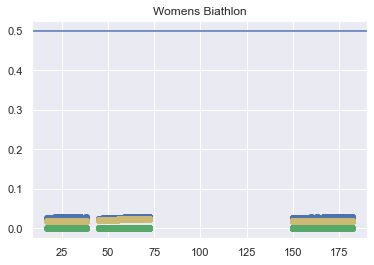

Score is 0.9734366353071389
Test score is 0.9806362378976486


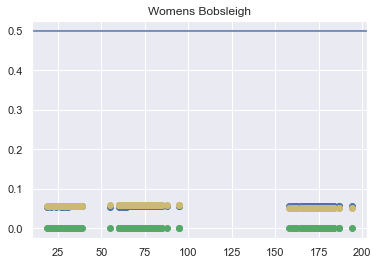

Score is 0.9440559440559441
Test score is 0.9137931034482759


C:\Users\monkc\AppData\Local\Programs\PythonCodingPack\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


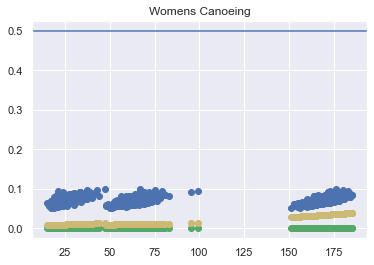

Score is 0.928125
Test score is 0.9296875


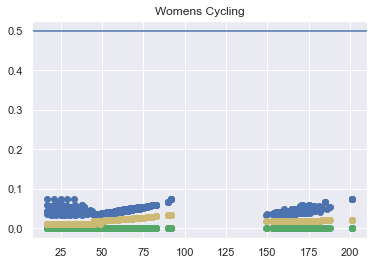

Score is 0.9566517189835575
Test score is 0.9421641791044776


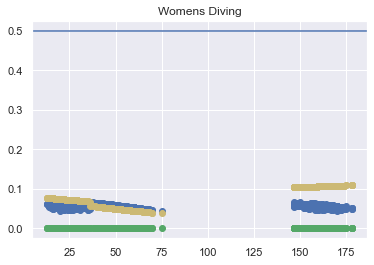

Score is 0.9450207468879668
Test score is 0.9507772020725389


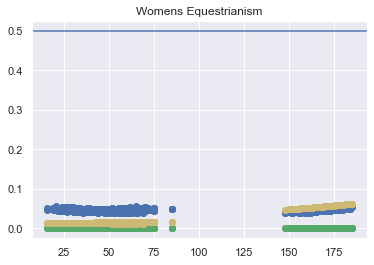

Score is 0.9531656548135299
Test score is 0.9502164502164502


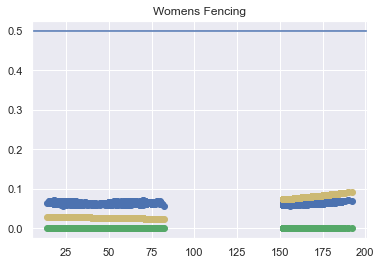

Score is 0.9357384441939121
Test score is 0.9380281690140845


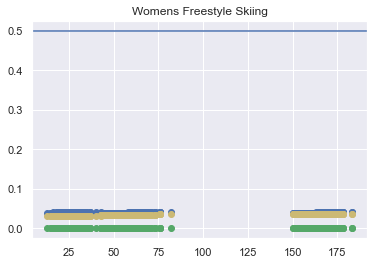

Score is 0.9601873536299765
Test score is 0.9649122807017544


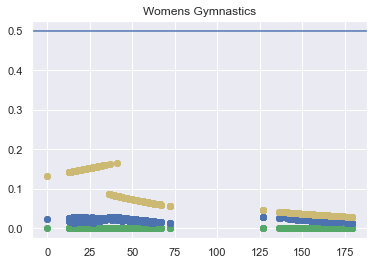

Score is 0.9783418402538281
Test score is 0.9796551724137931


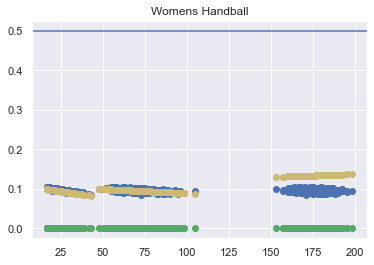

Score is 0.9033515198752923
Test score is 0.9280155642023347


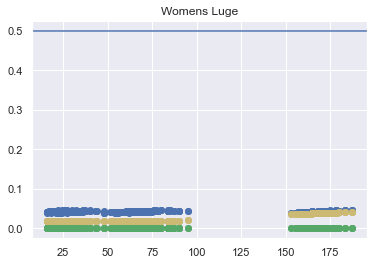

Score is 0.9572649572649573
Test score is 0.9645390070921985


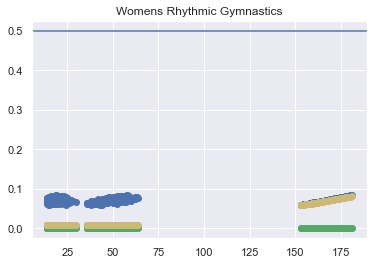

Score is 0.9282218597063622
Test score is 0.9390243902439024


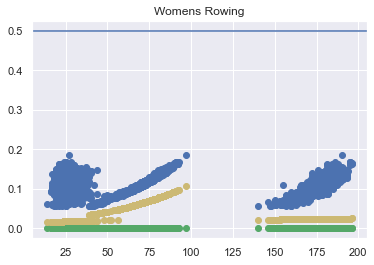

Score is 0.8883655204898728
Test score is 0.8847058823529412


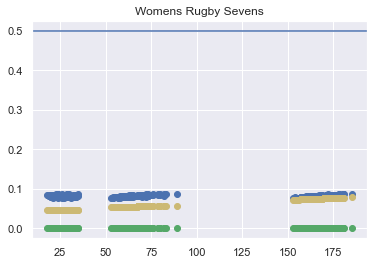

Score is 0.9178082191780822
Test score is 0.864406779661017


C:\Users\monkc\AppData\Local\Programs\PythonCodingPack\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


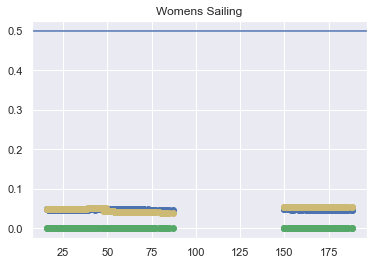

Score is 0.9517795637198623
Test score is 0.9484240687679083


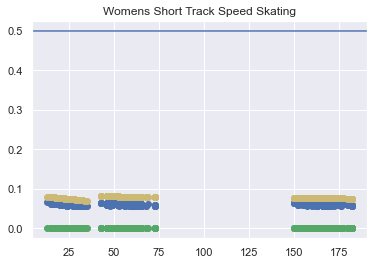

Score is 0.939106901217862
Test score is 0.9425675675675675


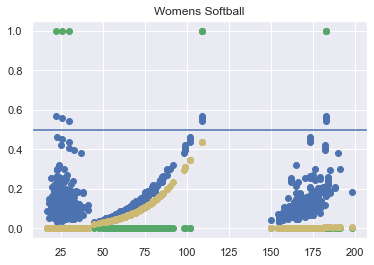

Score is 0.8820861678004536
Test score is 0.8813559322033898


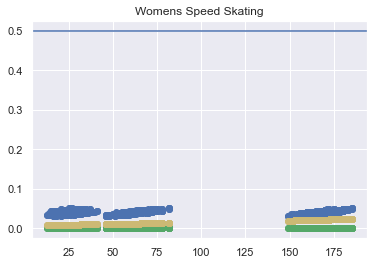

Score is 0.9598145285935085
Test score is 0.9472329472329473


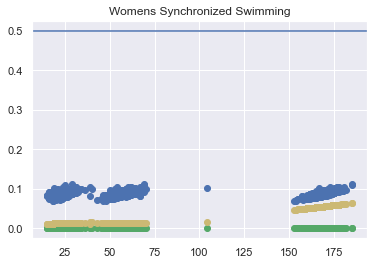

Score is 0.9128386336866903
Test score is 0.9088235294117647


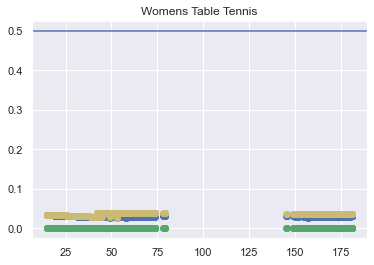

Score is 0.968677494199536
Test score is 0.9652173913043478


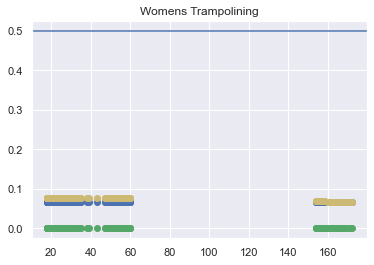

Score is 0.9333333333333333
Test score is 0.9333333333333333


C:\Users\monkc\AppData\Local\Programs\PythonCodingPack\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


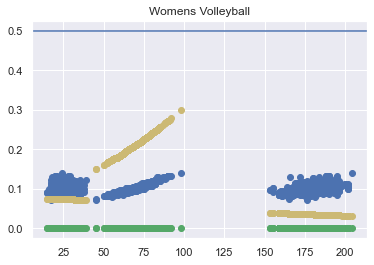

Score is 0.8982597054886211
Test score is 0.8846153846153846


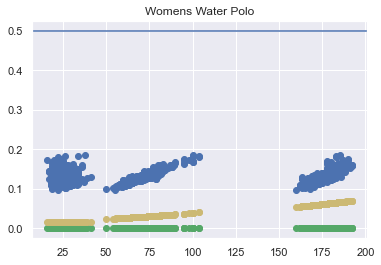

Score is 0.8709016393442623
Test score is 0.8673469387755102


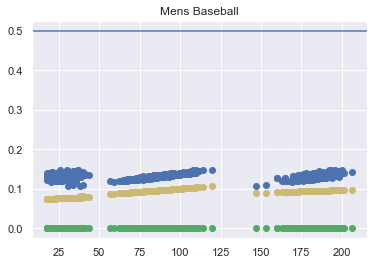

Score is 0.8687943262411347
Test score is 0.8672566371681416


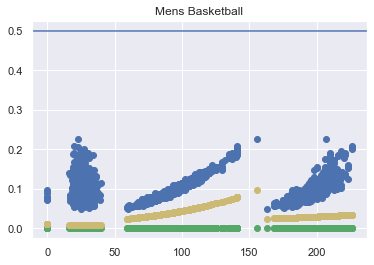

Score is 0.9055915721231766
Test score is 0.9089068825910931


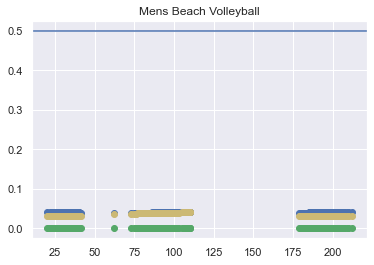

Score is 0.9597069597069597
Test score is 0.9636363636363636


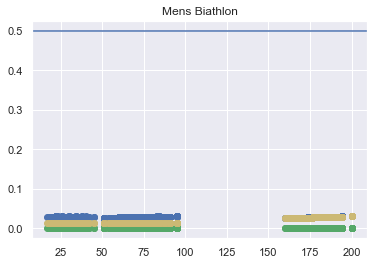

Score is 0.9718660968660968
Test score is 0.9724199288256228


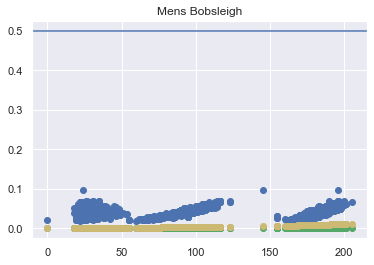

Score is 0.9597673291323315
Test score is 0.9539951573849879


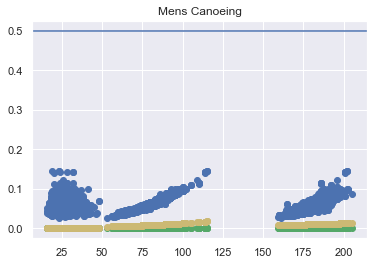

Score is 0.9391100702576113
Test score is 0.9426229508196722


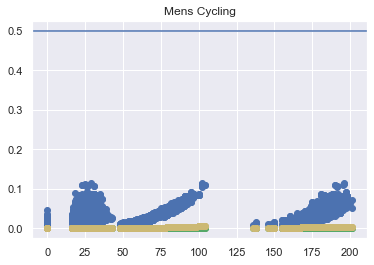

Score is 0.9649745409659003
Test score is 0.9676050906286155


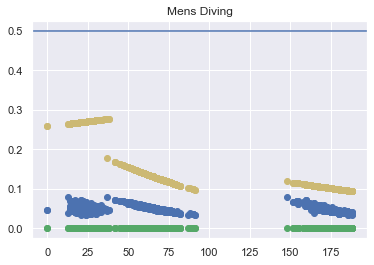

Score is 0.9502392344497608
Test score is 0.9545454545454546


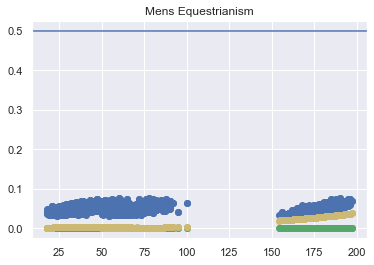

Score is 0.951764705882353
Test score is 0.9522058823529411


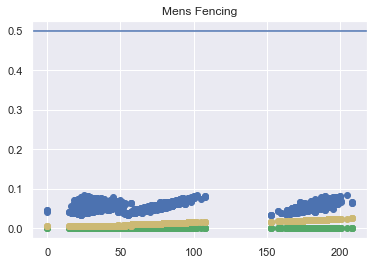

Score is 0.9452370960973563
Test score is 0.9459884635553225


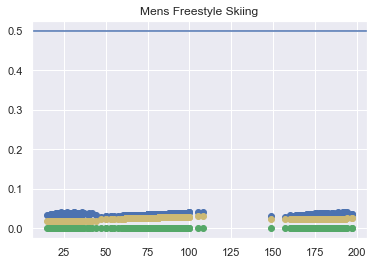

Score is 0.9650205761316872
Test score is 0.958974358974359


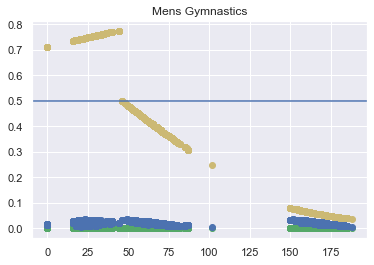

Score is 0.9793469159921854
Test score is 0.9806976744186047


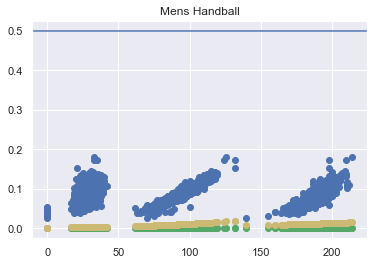

Score is 0.9210526315789473
Test score is 0.9269183922046285


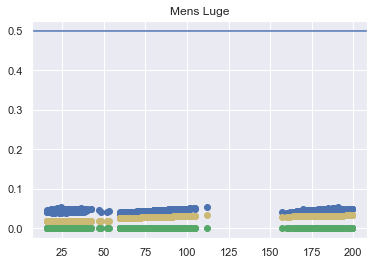

Score is 0.9551656920077972
Test score is 0.9586374695863747


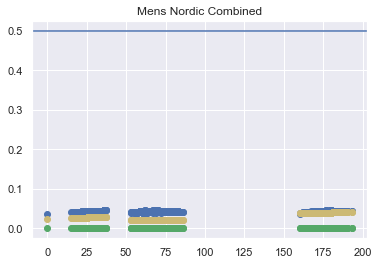

Score is 0.9577861163227017
Test score is 0.9648711943793911


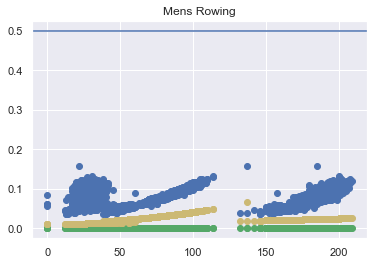

Score is 0.9148298360077588
Test score is 0.9158219479947113


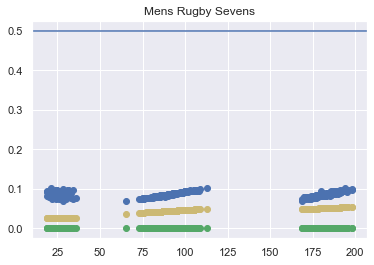

Score is 0.9139072847682119
Test score is 0.9344262295081968


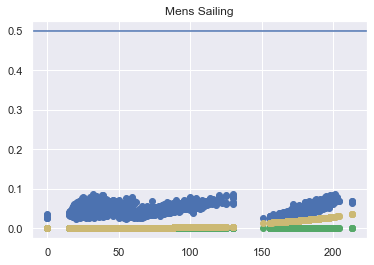

Score is 0.9539654741055792
Test score is 0.9512195121951219


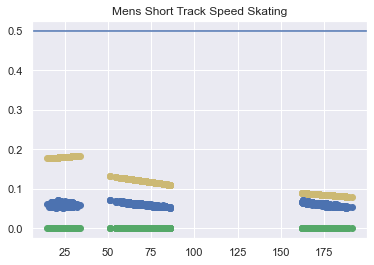

Score is 0.9399198931909212
Test score is 0.9466666666666667


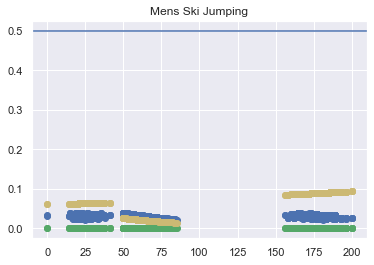

Score is 0.9691040164778579
Test score is 0.9536679536679536


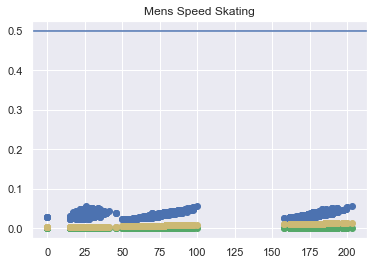

Score is 0.9642857142857143
Test score is 0.9645030425963489


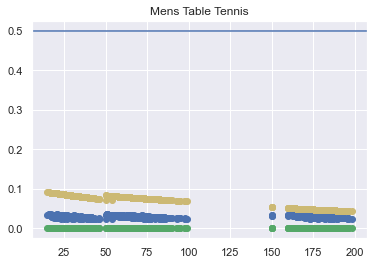

Score is 0.970873786407767
Test score is 0.967654986522911


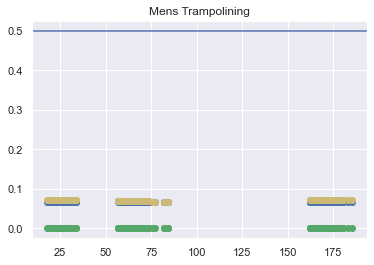

Score is 0.9324324324324325
Test score is 1.0


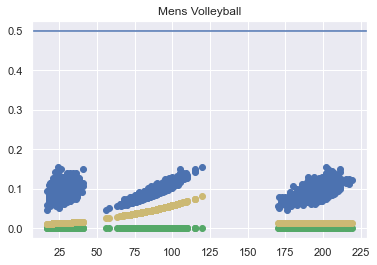

Score is 0.9079685746352413
Test score is 0.9018232819074333


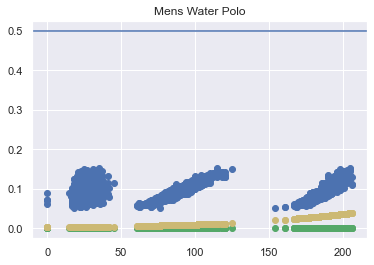

Score is 0.907871198568873
Test score is 0.8960893854748604


In [24]:
print(len(df.Medal))


def logistic(model,x):
    z = np.exp(model.intercept_ + model.coef_ * x)
    return z/(1+z)


# for sport in approvedsports:
#     podium = []
#     for elem in sport.Medal:
#         if elem > 0:
#             podium.append(1)
#         else:
#             podium.append(0)

#     print(len(podium))

theGold = []
for elem in df.Medal:
    if elem == 3:
        theGold.append(1)
    else:
        theGold.append(0)




for sport in approvedsportsfem:
    # podium = []
    # for elem in sport.Medal:
    #     if elem > 0:
    #         podium.append(1)
    #     else:
    #         podium.append(0)
    # print(sport.Sport, sport.Sex)
    theGold = []
    for elem in sport.Medal:
        if elem == 3:
            theGold.append(1)
        else:
            theGold.append(0)
    y,X = patsy.dmatrices('theGold ~ 0 + sport.Weight + sport.Height + sport.Age', data = sport)
    logithMod = sk.linear_model.LogisticRegressionCV()
    podmod = logithMod.fit(X,y.ravel())
    # plt.plot(X,y,'ro')
    y_hat = podmod.predict(X)
    y_hat_p = podmod.predict_proba(X)
    plt.plot(X,y_hat,'go')
    plt.plot(X,y_hat_p[:,1],'bo')
    plt.plot(X, logistic(podmod,X),'yo')
    plt.axhline(.5)
    plt.title("Womens {}".format(sport.Sport.iloc[0]))
    plt.show()
    print("Score is", podmod.score(X,y.ravel()))
    xtrain,xtest,ytrain,ytest = sk.model_selection.train_test_split(X,y, test_size = .4, random_state = 0)
    podmod2 = podmod.fit(xtrain, ytrain.ravel())
    print("Test score is", podmod2.score(xtest, ytest.ravel()))

for sport in approvedsportsmale:
    theGold = []
    for elem in sport.Medal:
        if elem == 3:
            theGold.append(1)
        else:
            theGold.append(0)
    # print(sport.Sport, sport.Sex)
    y,X = patsy.dmatrices('theGold ~ 0 + sport.Weight + sport.Height + sport.Age', data = sport)
    logithMod = sk.linear_model.LogisticRegressionCV()
    podmod = logithMod.fit(X,y.ravel())
    # plt.plot(X,y,'ro')
    y_hat = podmod.predict(X)
    y_hat_p = podmod.predict_proba(X)
    plt.plot(X,y_hat,'go')
    plt.plot(X,y_hat_p[:,1],'bo')
    plt.plot(X, logistic(podmod,X),'yo')
    plt.axhline(.5)
    plt.title("Mens {}".format(sport.Sport.iloc[0]))
    plt.show()
    print("Score is", podmod.score(X,y.ravel()))
    xtrain,xtest,ytrain,ytest = sk.model_selection.train_test_split(X,y, test_size = .4, random_state = 0)
    podmod2 = podmod.fit(xtrain, ytrain.ravel())
    print("Test score is", podmod2.score(xtest, ytest.ravel()))



The blue dots are the models predictions for whether someone will win a medal or not place. The far left lines are for age, the middle lines for weight, and the rightmost lines for height. It was almost never predicted that someone would get a gold medal with the exception of softball players. However, this is expected because quite obviously the vast majority of participants at the olympics do not win a gold medal. So despite there not being clear classification seen, it is still telling that in some sports, like basketball, the tallest and heaviest are much more likely to get gold than nothing, even though they are still more likely to get nothing than gold. 

I chose to use a logistic classification because I wanted to try to simply predict between binary values: winning and leaving with nothing. The score and test score of each model prediction is shown and most of them are relatively well fitting with scores around .90. 


I seperated the men and the women because the winners from the women were still shorter than the losers from the men and it was confounding the results having winners of each sport be so drastically different. 

## Final Model

Lastly, I wanted to use a K-Nearest Neighbor model to predict what medal someone would win given their age, height, and weight. I seperated the sexes again and thus made two models, one for women and one for men. I chose to use a KNN model because this is a classification problem where I was using multiple features to predict out of 4 different potential classes. I chose to use only the 5 nearest neighbors because since the differences within each sport was not always large. 

In [25]:
#KNNeighbor

###Males only 

dataM = data[data['Sex'] == 'M']

KX = dataM.iloc[:, [4,5,3]].values # height, weight, age
KY = dataM.iloc[:, 9].values # medal

KXtrain, KXtest, KYtrain, KYtest = sk.model_selection.train_test_split(KX, KY, test_size = .25, random_state = 0)
scaler = sk.preprocessing.StandardScaler()
KXtrain = scaler.fit_transform(KXtrain)
KXtest = scaler.transform(KXtest)  

#trainit
clf = neighbors.KNeighborsClassifier(n_neighbors=5, weights="uniform")
clf.fit(KXtrain,KYtrain)

#pred 
KYpred = clf.predict(KXtest)
print("Males only\n\n", clf.score(KXtest, KYtest))

#confusion
conf = sk.metrics.confusion_matrix(KYtest, KYpred)
print(conf)
print(sk.metrics.classification_report(KYtest,KYpred))




###Females only 
dataF = data[data['Sex'] == 'F']

KX = dataF.iloc[:, [4,5,3]].values # height, weight, age
KY = dataF.iloc[:, 9].values # medal

KXtrain, KXtest, KYtrain, KYtest = sk.model_selection.train_test_split(KX, KY, test_size = .25, random_state = 0)
scaler = sk.preprocessing.StandardScaler()
KXtrain = scaler.fit_transform(KXtrain)
KXtest = scaler.transform(KXtest)  

#trainit
clf = neighbors.KNeighborsClassifier(n_neighbors=5, weights="uniform")
clf.fit(KXtrain,KYtrain)

#pred 
KYpred = clf.predict(KXtest)
print("Females only\n\n",clf.score(KXtest, KYtest))

#confusion
conf = sk.metrics.confusion_matrix(KYtest, KYpred)
print(conf)
print(sk.metrics.classification_report(KYtest,KYpred))









Males only

 0.8461708598285872
[[15284    41    32    71]
 [  905     6     3     5]
 [  824     4     2     8]
 [  881     5     3    11]]
              precision    recall  f1-score   support

           0       0.85      0.99      0.92     15428
           1       0.11      0.01      0.01       919
           2       0.05      0.00      0.00       838
           3       0.12      0.01      0.02       900

    accuracy                           0.85     18085
   macro avg       0.28      0.25      0.24     18085
weighted avg       0.74      0.85      0.78     18085

Females only

 0.8199035812672176
[[7124   36   47   33]
 [ 478    4    6    7]
 [ 454    3    8    5]
 [ 484    7    9    7]]
              precision    recall  f1-score   support

           0       0.83      0.98      0.90      7240
           1       0.08      0.01      0.01       495
           2       0.11      0.02      0.03       470
           3       0.13      0.01      0.03       507

    accuracy             

Above are two confusion matrices. The topmost matrix is for men only and the summary chart for the matrix is below it. the 0,1,2,3 once again represent no medal, bronze, silver, and gold. As is expected and predicted, the vast majority leave empty handed. 11/95 winners from the men were predicted correctly. Which is impressive in my opinion as out of 18,085 men, guessing even 1 winner is remarkably unlikely and all the data used in the prediction is remarkably easy to obtain. The accuracy and precision for each was similar for the model between both sexes. 

## Conclusion

This was interesting to look at and while my models won't be predicting winners, they do offer insight into who is more likely to win provided everything else between competitors is equal except their height, weight, and age. The logistic model predicted virtually everyone would lose, which ultimately is a good prediction provided that the vast majority of competitors will in fact not win. There are ways that I think the accuracy of these models could be improved however, such as if the dataset was more complete and more specific. If athletics was broken apart into each of its own categories so that they could be examined would be beneficial and interesting to see. The models however were not altoghether unhelpful as they had adequate to good scores of .8-.9 and they had surprising accuracy despite still being technically innaccurate. A precision rate of only about 12% at predicting who would win in the KNN model is low but it is tremendously more accurate than a random guess. The logistic model also showed that the tallest and heaviest had a 'relative' predicted likelihood of winning that was much higher than the shortest and lightest competitors despite overall still having low ~20% chances of winning. 


Ultimately this is worth looking more into with more data and with different sports. If a sport is eventually found with a high enough relationship to these traits it could potentially be evidence of that sport needing classes for different heights or ages, or like what many sports already have - weightclasses. 